**Problem Statement:**

You are the Data Scientist at a telecom company “Leo” whose customers are churning out to its competitors. You have to analyse the data of your company and find insights and stop your customers from churning out to other telecom companies.

**Customer_churn Dataset:**

The details regarding this ‘customer_churn’ dataset are present in the data dictionary:

Domain –Telecom

**Domain Context**

Customer churn, in simple terms means that the customer has stopped doing business with the company and this is a common problem when it comes to telecom industries. To avoid this, companies use predictive analysis to gauge the factors responsible for a customer to leave the company. These churn prediction
models help in finding out the customer base that are most likely to churn out.

**Lab Environment:** Jupyter Notebook

**Tasks to be done:**

 **A) Data Manipulation:**

a. Find the total number of male customers

b. Find the total number of customers whose Internet Service is ‘DSL’

c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the result in ‘new_customer’

d. Extract all those customers whose tenure is less than 10 months or their Total charges is less than 500$ & store the result in ‘new_customer’

**B) Data Visualization:**

a. Build a pie-chart to show the distribution of customers would be churning out

b. Build a bar-plot to show the distribution of ‘Internet Service’

**C) Model Building:**

a. Build a sequential model using Keras, to find out if the customerwouldchurn or not, using ‘tenure’ as the feature and ‘Churn’ as the dependent/target column:

i.The visible/input layer should have 12 nodes with ‘Relu’ as activation function.

ii.This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function

iii. Use ‘Adam’ as the optimization algorithm

iv.Fit the model on the train set, with number of epochs to be 150

v.Predict the values on the test set and build a confusion matrix

vi.Plot the ‘Accuracy vs Epochs’ graph

b. Build the 2nd model using same target and feature variables:

i. Add a drop-out layer after the input layer with drop-out value of 0.3

ii.Add a drop-out layer after the hidden layer with drop-out value of 0.2

iii.Predict the values on the test set and build a confusion matrix

iv.Plot the ‘Accuracy vs Epochs’ graph


c. Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and ‘Churn’ as the dependent/target column:

i.The visible/input layer should have 12 nodes with ‘Relu’ as activation function.

ii.This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function

iii.Use ‘Adam’ as the optimization algorithm

iv. Fit the model on the train set, with number of epochs to be 150

v. Predict the values on the test set and build a confusion matrix

vi.Plot the ‘Accuracy vs Epochs’ graph


In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from keras.models import Sequential
from keras.layers import Dense,Dropout


In [79]:
df=pd.read_csv("/content/customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


a. Find the total number of male customers

In [80]:
total_male_customers=sum(df['gender']=='Male')
print(f"total male customers:{total_male_customers}")

total male customers:3555


b. Find the total number of customers whose Internet Service is ‘DSL’

In [81]:
total_dsl_customers=sum(df['InternetService']=='DSL')
print(f"total dsl customers:{total_dsl_customers}")

total dsl customers:2421


c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the result in ‘new_customer

In [82]:
new_customer=df[(df['gender']=='Female') & (df['SeniorCitizen'] ==1 ) & (df['PaymentMethod']=='Mailed check')]
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.6,No


d. Extract all those customers whose tenure is less than 10 months or their Total charges is less than 500$ & store the result in ‘new_customer’

In [83]:
new_customer=df[(df['tenure']<10) | (df['MonthlyCharges']<500)]
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**B) Data Visualization:**

a. Build a pie-chart to show the distribution of customers would be churning out

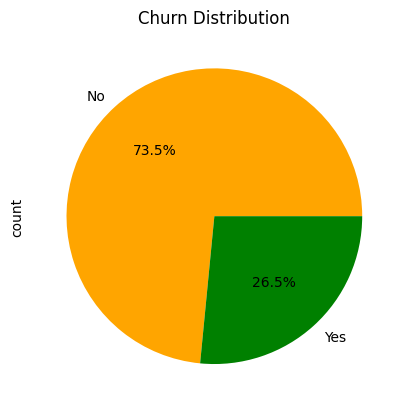

In [84]:
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', colors=['orange', 'green'])
plt.title("Churn Distribution")
plt.show()


b. Build a bar-plot to show the distribution of ‘Internet Service’

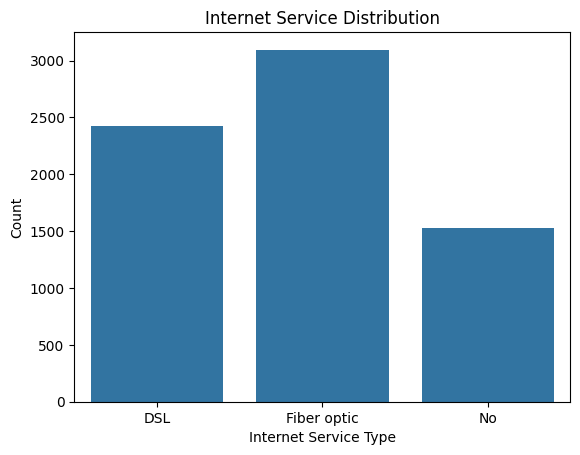

In [85]:
sns.countplot(x=df['InternetService'])
plt.title("Internet Service Distribution")
plt.xlabel("Internet Service Type")
plt.ylabel("Count")
plt.show()


**C) Model Building:**

a. Build a sequential model using Keras, to find out if the customerwouldchurn or not, using ‘tenure’ as the feature and ‘Churn’ as the dependent/target column:

i.The visible/input layer should have 12 nodes with ‘Relu’ as activation function.

ii.This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function

iii. Use ‘Adam’ as the optimization algorithm

iv.Fit the model on the train set, with number of epochs to be 150

v.Predict the values on the test set and build a confusion matrix

vi.Plot the ‘Accuracy vs Epochs’ graph

In [89]:
x=df[['tenure']]
y=LabelEncoder().fit_transform(df[['Churn']])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [92]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [93]:
model=Sequential()
model.add(Dense(12,input_dim=1,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [95]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [96]:
history=model.fit(x_train,y_train,epochs=150,validation_data=(x_test,y_test))

Epoch 1/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7248 - loss: 0.6315 - val_accuracy: 0.7283 - val_loss: 0.5325
Epoch 2/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7416 - loss: 0.5258 - val_accuracy: 0.7283 - val_loss: 0.5152
Epoch 3/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7233 - loss: 0.5196 - val_accuracy: 0.7283 - val_loss: 0.5117
Epoch 4/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7339 - loss: 0.5170 - val_accuracy: 0.7283 - val_loss: 0.5121
Epoch 5/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7351 - loss: 0.5100 - val_accuracy: 0.7283 - val_loss: 0.5108
Epoch 6/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7334 - loss: 0.5230 - val_accuracy: 0.7283 - val_loss: 0.5118
Epoch 7/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7303 - loss: 0.5229 - val_accuracy: 0.7283 - val_loss: 0.5106
Epoch 8/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7215 - loss: 0.5230 - val_accu

In [97]:
np.mean(model.history.history['val_accuracy'])

0.7488689064979553

In [98]:
y_pred=model.predict(x_test)
y_pred = (y_pred > 0.5).astype("int32")
confusion_matrix(y_test,y_pred)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1426,  113],
       [ 405,  169]])

<function matplotlib.pyplot.show(close=None, block=None)>

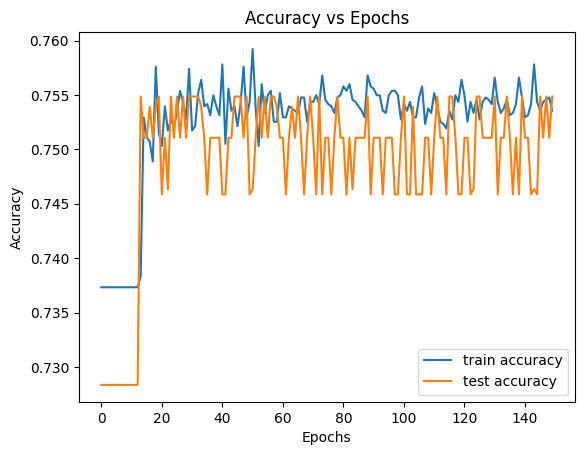

In [99]:
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='test accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show

b. Build the 2nd model using same target and feature variables:

i. Add a drop-out layer after the input layer with drop-out value of 0.3

ii.Add a drop-out layer after the hidden layer with drop-out value of 0.2

iii.Predict the values on the test set and build a confusion matrix

iv.Plot the ‘Accuracy vs Epochs’ graph


In [103]:
model2=Sequential()
model2.add(Dense(12,input_dim=1,activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(8,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [106]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [107]:
history2=model2.fit(x_train,y_train,epochs=150,validation_data=(x_test,y_test))

Epoch 1/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - acc: 0.7128 - loss: 0.6384 - val_acc: 0.7283 - val_loss: 0.5472
Epoch 2/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - acc: 0.7421 - loss: 0.5447 - val_acc: 0.7283 - val_loss: 0.5221
Epoch 3/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.7302 - loss: 0.5362 - val_acc: 0.7283 - val_loss: 0.5180
Epoch 4/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.7184 - loss: 0.5504 - val_acc: 0.7283 - val_loss: 0.5168
Epoch 5/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7304 - loss: 0.5365 - val_acc: 0.7283 - val_loss: 0.5162
Epoch 6/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7425 - loss: 0.5205 - val_acc: 0.7283 - val_loss: 0.5154
Epoch 7/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7506 - loss: 0.5209 - val_acc: 0.7283 - val_loss: 0.5146
Epoch 8/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7424 - loss: 0.5182 - val_acc: 0.7283 - val_loss: 0.5142
Epoch 9/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

In [115]:
np.mean(model2.history.history['val_acc'])

0.7316611409187317

In [109]:
y_pred = (model.predict(x_test) > 0.5).astype("int32")
confusion_matrix(y_test,y_pred)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[1539,    0],
       [ 574,    0]])

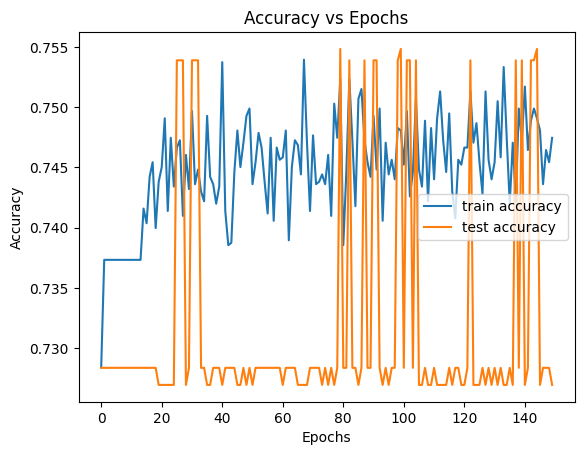

In [117]:
plt.plot(history2.history['acc'],label='train accuracy')
plt.plot(history2.history['val_acc'],label='test accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

c. Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and ‘Churn’ as the dependent/target column:

i.The visible/input layer should have 12 nodes with ‘Relu’ as activation function.

ii.This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function

iii.Use ‘Adam’ as the optimization algorithm

iv. Fit the model on the train set, with number of epochs to be 150

v. Predict the values on the test set and build a confusion matrix

vi.Plot the ‘Accuracy vs Epochs’ graph

In [124]:
x = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
y = LabelEncoder().fit_transform(df['Churn'])


In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [122]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

ValueError: could not convert string to float: ' '

In [123]:
# Replace empty strings in 'TotalCharges' with 0 and convert the column to numeric
x['TotalCharges'] = pd.to_numeric(x['TotalCharges'].str.replace(' ', '0', regex=False), errors='coerce').fillna(0)

# Proceed with the train-test split and scaling
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

<ipython-input-123-950f607ee150>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['TotalCharges'] = pd.to_numeric(x['TotalCharges'].str.replace(' ', '0', regex=False), errors='coerce').fillna(0)


In [126]:
model3=Sequential()
model3.add(Dense(12,input_dim=3,activation='relu'))
model3.add(Dense(8,activation='relu'))
model3.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [127]:
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [129]:
history3=model3.fit(x_train,y_train,epochs=150,validation_data=(x_test,y_test))

Epoch 1/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - acc: 0.7292 - loss: 0.5887 - val_acc: 0.7283 - val_loss: 0.4916
Epoch 2/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - acc: 0.7417 - loss: 0.4803 - val_acc: 0.7709 - val_loss: 0.4693
Epoch 3/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - acc: 0.7841 - loss: 0.4693 - val_acc: 0.7795 - val_loss: 0.4625
Epoch 4/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - acc: 0.7761 - loss: 0.4938 - val_acc: 0.7804 - val_loss: 0.4572
Epoch 5/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - acc: 0.7768 - loss: 0.4721 - val_acc: 0.7847 - val_loss: 0.4536
Epoch 6/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - acc: 0.7805 - loss: 0.4656 - val_acc: 0.7809 - val_loss: 0.4492
Epoch 7/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.7954 - loss: 0.4491 - val_acc: 0.7866 - val_loss: 0.4474
Epoch 8/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.7947 - loss: 0.4570 - val_acc: 0.7828 - val_loss: 0.4450
Epoch 9/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s

In [ ]:
y_pred=model.predict(x_test)
y_pred=(y_pred>0.5).astype("int32")
confusion_matrix(y_test,y_pred)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[1470,   69],
       [ 372,  202]])

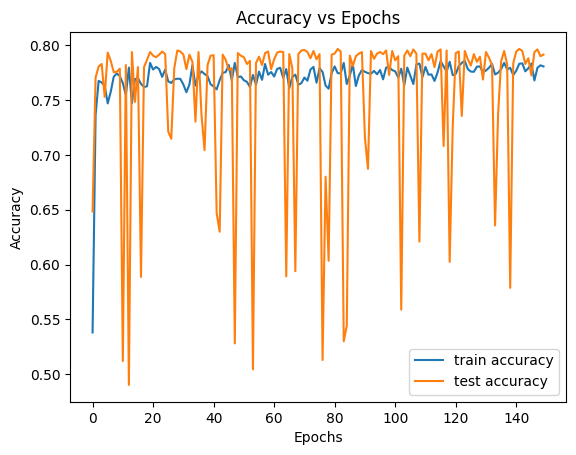

In [ ]:
plt.plot(history.history['acc'],label='train accuracy')
plt.plot(history.history['val_acc'],label='test accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()